# Back to statistical analysis of the Jpred4 dataset
- Computing basic statistics on our training dataset
- Assessing the adequacy of the dataset for our purposes
- Demonstrate that the dataset is a proper snapshot of the real protein space

## Describe the dataset producing the following plots:
- The distribution of domain lengths - boxplot/hist/distplot
- The relative abundance of secondary structure conformations - pie plot
- Comparative amino-acid composition of: - countplot with normalize bar
 - The entire dataset
 - The fraction of helix, strand and coil residues
- Taxonomic classification (at superkingdom and species level) - pie or countplot [reducing the number of species shown]
- Structural classification (SCOP class)

**Which kind of plot would you use for each point?**

In [2]:
# import modules
import seaborn as sn
import pandas as pd
import matplotlib as plt
import os
import numpy as np
import matplotlib.pyplot as plt

### Import the data

In [2]:
df = pd.read_csv('jpred4.tsv', sep= '\t')
df

,DomainID,PDB,SCOPID,SCOPClass,Length,Suprekingdom,TaxaID,TaxaName
0,d1a12a_,1a12,b.69.5.1,All beta,401,eukaryota,9606,Homo sapiens
1,d1a1xa_,1a1x,b.63.1.1,All beta,106,eukaryota,9606,Homo sapiens
2,d1a62a1,1a62,a.140.3.1,All alpha,47,bacteria,469008,Escherichia coli BL21(DE3)
3,d1a9xa1,1a9x,a.92.1.1,All alpha,153,bacteria,562,Escherichia coli
4,d1acoa1,1aco,c.8.2.1,Alpha and beta (a/b),226,eukaryota,9913,Bos taurus
...,...,...,...,...,...,...,...,...
1343,e1n13.1B,1n13,d.155.1.2,Alpha and beta (a+b),112,archaea,2190,Methanocaldococcus jannaschii
1344,e1qd6.1C,1qd6,f.4.2.1,Membrane and cell surface proteins and peptides,240,bacteria,562,Escherichia coli
1345,e1qqp.12,1qqp,b.121.4.1,All beta,216,viruses,12110,Foot-and-mouth disease virus
1346,e1qtn.1A,1qtn,c.17.1.1,Alpha and beta (a/b),152,eukaryota,9606,Homo sapiens


### 1. Distribution of domain lengths - boxplot/hist/distplot

In [6]:
sn.set()
sn.displot(df.Length, color='green')

NameError: name 'df' is not defined

<AxesSubplot:>

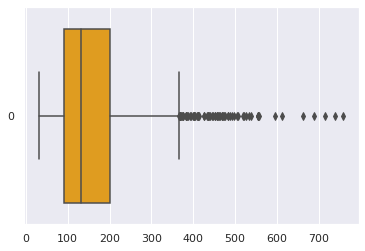

In [4]:
sn.boxplot(data = df.Length, orient='h', color='orange')

### 2.The relative abundance of secondary structure conformations - pie plot

In [3]:
d = {}

for filename in os.listdir('dssp/'):
    if filename.endswith('.dssp'):
        filename = 'dssp/'+filename
        f = open(filename)
        for line in f:
            if '>' not in line:
                for char in line.rstrip():
                    d[char] = d.get(char,0)+1
        f.close()

In [4]:
ss_df = pd.DataFrame(d.items(), columns=['ss', 'count'])
ss_df = ss_df.set_index('ss')

<AxesSubplot:ylabel='count'>

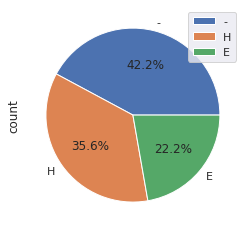

In [7]:
ss_df.plot.pie(y="count", autopct='%1.1f%%')

### 3. Comparative amino-acid composition of: - countplot with normalize bar
#### 3.1 The entire dataset

In [8]:
aa = {}

for filename in os.listdir('fasta/'):
    if filename.endswith('.fasta'):
        filename = 'fasta/'+filename
        f = open(filename)
        for line in f:
            if '>' not in line:
                for char in line.rstrip():
                    aa[char] = aa.get(char,0)+1
                    
        f.close()

In [9]:
aa_df = pd.DataFrame(aa.items(), columns=['aa', 'count'])
aa_df['count'] = aa_df['count'] / aa_df['count'].sum()

<AxesSubplot:xlabel='aa', ylabel='count'>

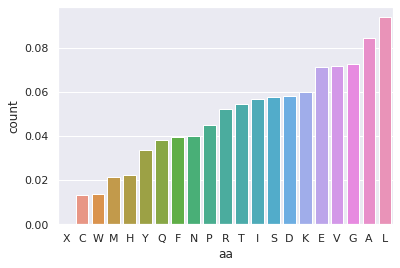

In [10]:
sn.barplot(data = aa_df.sort_values('count'), y = 'count', x = 'aa')

 #### 3.2 The fraction of helix, strand and coil residues

In [11]:
coil = {}
helix = {}
strand = {}

for (f_fasta, f_dssp) in zip(sorted(os.listdir('fasta/')), sorted(os.listdir('dssp/'))):
    if f_fasta.endswith('.fasta') and f_dssp.endswith('.dssp'):
        f_fasta = 'fasta/' + f_fasta
        f_dssp = 'dssp/' + f_dssp
        ffasta = open(f_fasta)
        fdssp = open(f_dssp)                      
        for (fastaline,dsspline) in zip(ffasta,fdssp):
            if '>' not in fastaline and '>' not in dsspline:
                for (charfasta,chardssp) in zip(fastaline.rstrip(), dsspline.rstrip()):
                    if chardssp == '-':
                        coil[charfasta] = coil.get(charfasta,0)+1
                    elif chardssp == 'E':
                        strand[charfasta] = strand.get(charfasta,0)+1
                    elif chardssp == 'H':
                        helix[charfasta] = helix.get(charfasta,0)+1
                     
        ffasta.close()
        fdssp.close()                
                                
del coil['X']

In [12]:
finaldict = {key:[coil[key], helix[key], strand[key]] for key in coil}

In [13]:
aass_df = pd.DataFrame([([k] + v) for k, v in finaldict.items()], columns=['aa','coil','helix', 'strand'])
aass_df

,aa,coil,helix,strand
0,K,5336,5332,2437
1,V,4039,5112,6494
2,S,6680,3458,2438
3,H,2276,1516,1105
4,R,4209,4815,2406
5,T,5405,3271,3226
6,E,5768,7450,2321
7,P,7250,1509,1092
8,G,10884,2520,2414
9,D,7488,3592,1598


In [14]:
aass_df['coilconf'] = aass_df['coil']/aass_df['coil'].sum()

In [15]:
aass_df['helixconf'] = aass_df['helix']/aass_df['helix'].sum()

In [16]:
aass_df['strandconf'] = aass_df['strand']/aass_df['strand'].sum()

In [17]:
aass_df['total'] = (aass_df['coil']+aass_df['helix']+aass_df['strand'])/(aass_df['strand'].sum()+aass_df['helix'].sum()+aass_df['coil'].sum())

In [18]:
aass_df

,aa,coil,helix,strand,coilconf,helixconf,strandconf,total
0,K,5336,5332,2437,0.057945,0.068586,0.050156,0.060000
1,V,4039,5112,6494,0.043860,0.065756,0.133654,0.071629
2,S,6680,3458,2438,0.072539,0.044480,0.050177,0.057578
3,H,2276,1516,1105,0.024715,0.019500,0.022742,0.022420
4,R,4209,4815,2406,0.045706,0.061936,0.049518,0.052331
5,T,5405,3271,3226,0.058694,0.042075,0.066395,0.054492
6,E,5768,7450,2321,0.062636,0.095830,0.047769,0.071143
7,P,7250,1509,1092,0.078729,0.019410,0.022475,0.045102
8,G,10884,2520,2414,0.118191,0.032415,0.049683,0.072421
9,D,7488,3592,1598,0.081314,0.046204,0.032889,0.058045


In [19]:
aass_df = aass_df.reset_index()

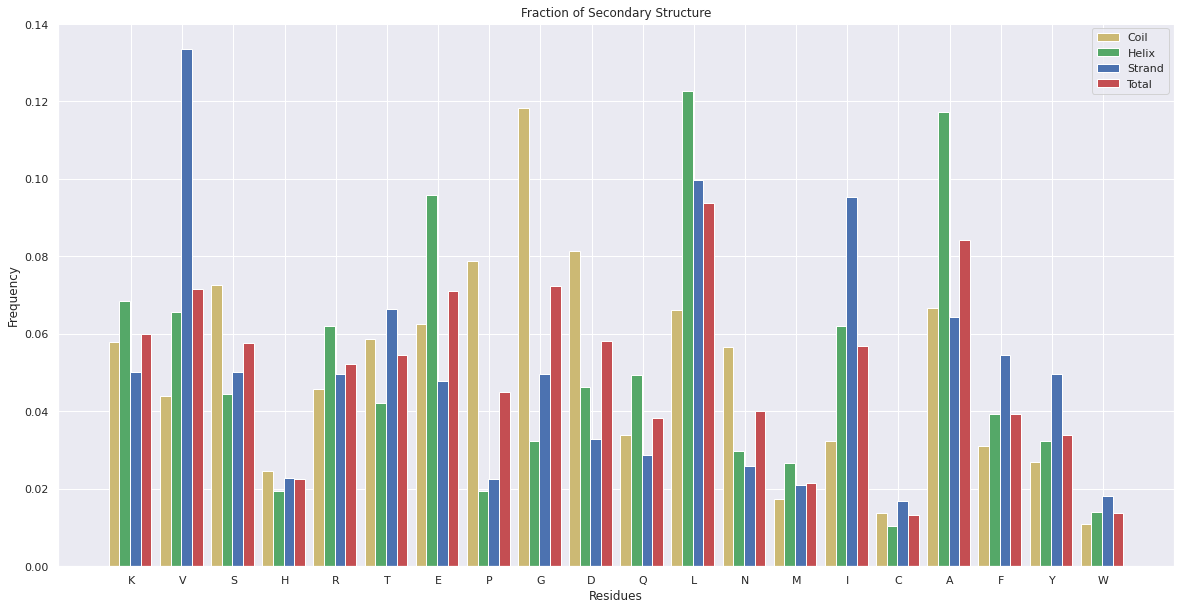

In [20]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[20, 10])
# Data to be plotted

# Using numpy to group 3 different data with bars
X = np.arange(len(aass_df['coilconf'])) * 1.2

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, aass_df['coilconf'], color = 'y', width = 0.25)
plt.bar(X + 0.25, aass_df['helixconf'], color = 'g', width = 0.25)
plt.bar(X + 0.5, aass_df['strandconf'], color = 'b', width = 0.25)
plt.bar(X + 0.75, aass_df['total'], color = 'r', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Coil', 'Helix', 'Strand', 'Total'])

# Overiding the x axis with the country names
plt.xticks([i*1.2 + 0.4 for i in range(20)], aass_df['aa'])

# Giving the tilte for the plot
plt.title("Fraction of Secondary Structure")
# Namimg the x and y axis
plt.xlabel('Residues')
plt.ylabel('Frequency')
# Saving the plot as a 'png'
plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

### 4. Taxonomic classification
#### 4.1 Superkingdom

<AxesSubplot:ylabel='Suprekingdom'>

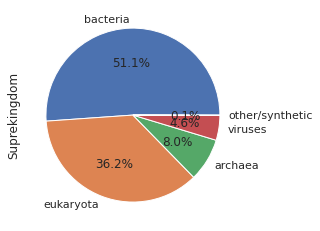

In [21]:
df.Suprekingdom.value_counts().plot.pie(autopct='%1.1f%%')

#### 4.2 Taxa name

<AxesSubplot:ylabel='TaxaName'>

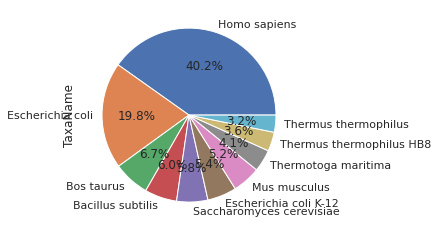

In [22]:
df.TaxaName.value_counts()[0:10].plot.pie(autopct='%1.1f%%')

In [23]:
Taxadf = df['TaxaName'].value_counts()

In [24]:
Taxadf = Taxadf.reset_index()

In [25]:
c = 0
for (x,char) in zip(Taxadf['TaxaName'], Taxadf['index']):
    if x < 30:
        Taxadf = Taxadf.replace(to_replace = char, value = 'Other')
        c += x
    else: print(char)

print(c)

Homo sapiens
Escherichia coli
Bos taurus
Bacillus subtilis
Saccharomyces cerevisiae
928


In [26]:
Taxadf

,index,TaxaName
0,Homo sapiens,215
1,Escherichia coli,106
2,Bos taurus,36
3,Bacillus subtilis,32
4,Saccharomyces cerevisiae,31
...,...,...
415,Other,1
416,Other,1
417,Other,1
418,Other,1


In [27]:
Taxa_df = Taxadf[:6] 
Taxa_df

,index,TaxaName
0,Homo sapiens,215
1,Escherichia coli,106
2,Bos taurus,36
3,Bacillus subtilis,32
4,Saccharomyces cerevisiae,31
5,Other,29


In [28]:
Taxa_df.at[5, 'TaxaName'] = c
Taxa_df

,index,TaxaName
0,Homo sapiens,215
1,Escherichia coli,106
2,Bos taurus,36
3,Bacillus subtilis,32
4,Saccharomyces cerevisiae,31
5,Other,928


<AxesSubplot:>

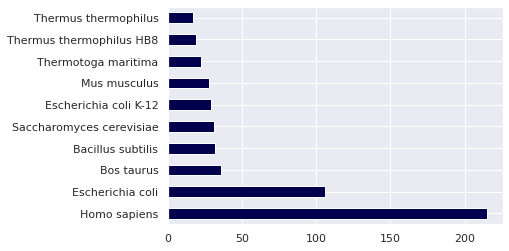

In [29]:
df['TaxaName'].value_counts().head(10).plot(kind='barh', cmap="seismic")

In [30]:
Taxa_df = Taxa_df.set_index('index')

<AxesSubplot:ylabel='TaxaName'>

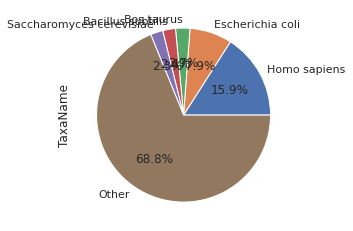

In [31]:
Taxa_df.plot.pie( y = 'TaxaName', legend = False, autopct='%1.1f%%')

### 5. Structural classification (SCOP class)

In [32]:
ssSCOP = df['SCOPClass'].value_counts()
ssSCOP

df_ssSCOP = ssSCOP.rename_axis("SCOPClass").to_frame("SCOPClass")
df_ssSCOP

,SCOPClass
SCOPClass,
Alpha and beta (a+b),394
All alpha,354
All beta,253
Alpha and beta (a/b),199
Small proteins,57
Membrane and cell surface proteins and peptides,54
Multi-domain proteins (alpha and beta),37


<AxesSubplot:ylabel='SCOPClass'>

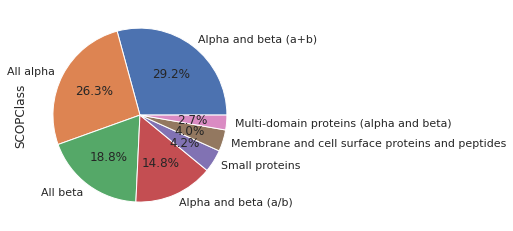

In [33]:
df_ssSCOP.plot.pie(y="SCOPClass",
            autopct='%1.1f%%',
                   legend = False)